# Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pageviewapi

In [ ]:
import numpy as np
import pandas as pd
import os
import json
import re
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
import pageviewapi

**Setting the directory paths**

In [ ]:
baseDir = '/content/drive/MyDrive/Time Series Analysis (Mini project)/Time Series Analysis (Mini project)'
datasets = 'Datasets'
datapath1 = 'train_data.csv'
datapath2 = 'json_files'

In [ ]:
import sys
# sys.path.append(baseDir + '/utils')
# # Custom module to fill in the views if not already requested
# import dataFill 

**Importing the dataset**

In [ ]:
dataframe = pd.read_csv(os.path.join(baseDir,datasets, datapath1), encoding="utf-8", parse_dates = True)
dataframe.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,46.0,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,39.0,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,22.0,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,37.0,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,12.0,11.0,7.0,9.0,6.0,10.0,8.0,13.0,3.0,14.0,4.0,9.0,14.0,10.0,8.0,3.0,74.0,17.0,8.0,6.0,9.0,3.0,10.0,21.0,9.0,5.0,3.0,4.0,1.0,...,41.0,35.0,18.0,18.0,15.0,16.0,13.0,14.0,29.0,18.0,28.0,21.0,10.0,19.0,13.0,8.0,54.0,19.0,14.0,41.0,32.0,46.0,31.0,29.0,31.0,28.0,17.0,16.0,8.0,13.0,13.0,13.0,45.0,4.0,13.0,20.0,18.0,17.0,14.0,11.0
6,91Days_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,33.0,8.0,7.0,5.0,12.0,7.0,9.0,11.0,8.0,10.0,10.0,7.0,51.0,12.0,10.0,14.0,11.0,9.0,9.0,9.0,68.0,8.0,40.0,6.0,14.0,11.0,6.0,9.0,7.0,12.0,8.0,5.0,7.0,8.0,10.0,8.0,5.0,3.0,5.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,32.0,17.0,23.0,47.0,33.0,47.0,58.0,29.0,187.0,128.0,34.0,38.0,8.0,38.0,17.0,45.0,14.0,15.0,56.0,30.0,15.0,115.0,6.0,25.0,10.0,135.0,40.0,63.0,32.0,35.0,...,43.0,33.0,20.0,

In [ ]:
#shape of the training dataset
dataframe.shape

(145063, 804)

**This function is used to extract all the languages that the articles are written in**

In [ ]:
def getLanguages(page):
    lan= re.search("[a-z][a-z].wikipedia.org", page)
    if lan:
        return lan[0][0:2]
    return("na")

dataframe["lang"]= dataframe.Page.map(getLanguages)

In [ ]:
dataframe

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,lang
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0,2.0,1.0,6.0,2.0,3.0,3.0,2.0,7.0,6.0,8.0,5.0,7.0,7.0,7.0,8.0,2.0,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0,es
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,2.0,3.0,3.0,18.0,4.0,5.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,9.0,10.0,8.0,6.0,3.0,9.0,2.0,11.0,3.0,3.0,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,

**We plot the count of number of articles that are present in each language**

In [ ]:
plt.rc_context({'axes.edgecolor':'#581845', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'#f6eee2', 'font.family' : 'serif'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


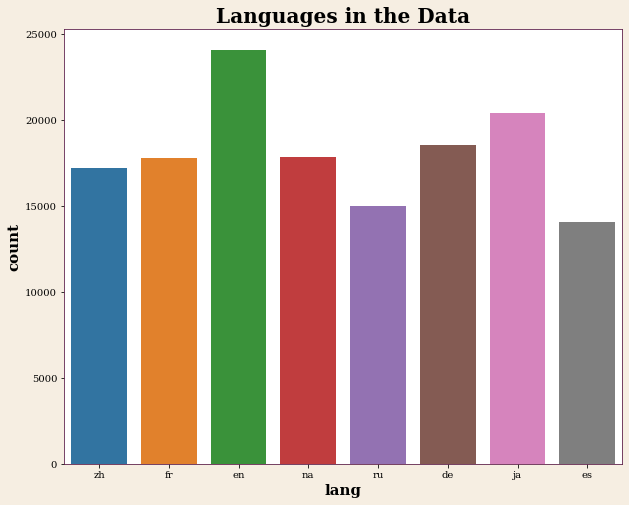

In [ ]:
plt.figure(figsize=[10,8])
plt.xlabel("", fontsize = 15, fontweight = 'bold')
plt.ylabel("Count", fontsize = 15, fontweight = 'bold')
plt.title('Languages in the Data', fontsize = 20, fontweight = 'bold')
sns.countplot(dataframe["lang"])

In [ ]:
set(dataframe['lang'])

{'de', 'en', 'es', 'fr', 'ja', 'na', 'ru', 'zh'}

Setting the parameters

In [ ]:
lang_ja = dataframe[dataframe['lang'] == 'ja']
lang_es = dataframe[dataframe['lang'] == 'es']
lang_de = dataframe[dataframe['lang'] == 'de']
lang_zh = dataframe[dataframe['lang'] == 'zh']
lang_fr = dataframe[dataframe['lang'] == 'fr']
lang_ru = dataframe[dataframe['lang'] == 'ru']
lang_na = dataframe[dataframe['lang'] == 'na']
lang_en = dataframe[dataframe['lang'] == 'en']

In [ ]:
start = '2015-07-01'
end = '2017-09-10'

In [ ]:
def plot_graph(df, n_series):
    sample = df.sample(n_series, random_state = 42)
    page = sample["Page"].to_list()
    series_sample = sample.loc[ : , start : end]
    plt.figure(figsize = (10, 6))
    
    
    for i in range(series_sample.shape[0]):
        np.log1p(pd.Series(series_sample.iloc[i]).astype(np.float64)).plot(linewidth = 1.5)
    
    plt.title("Time vs Views on random website")
    plt.legend(page)
    plt.tight_layout()



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20489 missing from current font.
  font.set_

(None, None, None, None, None, None, None, None)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20489 missing from current font.
  font.set_

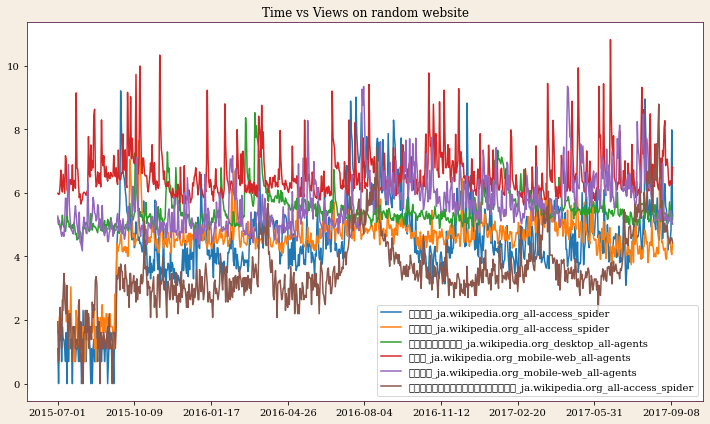

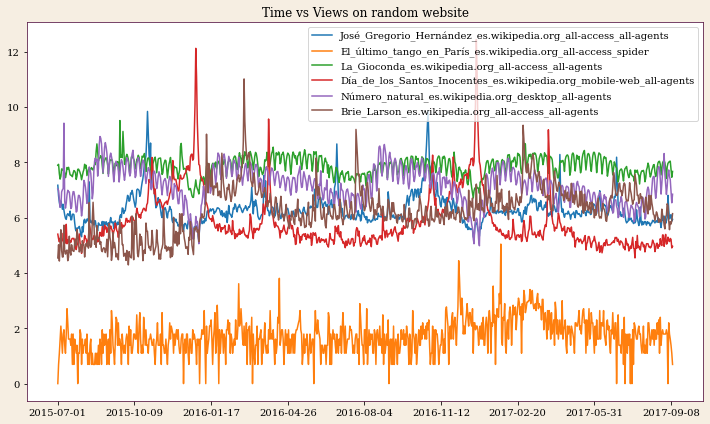

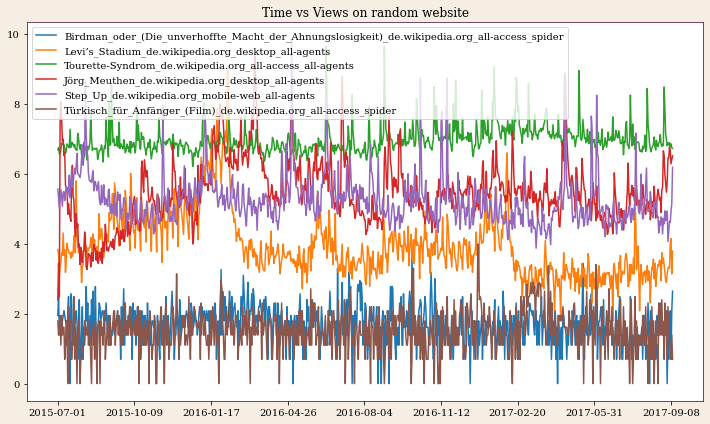

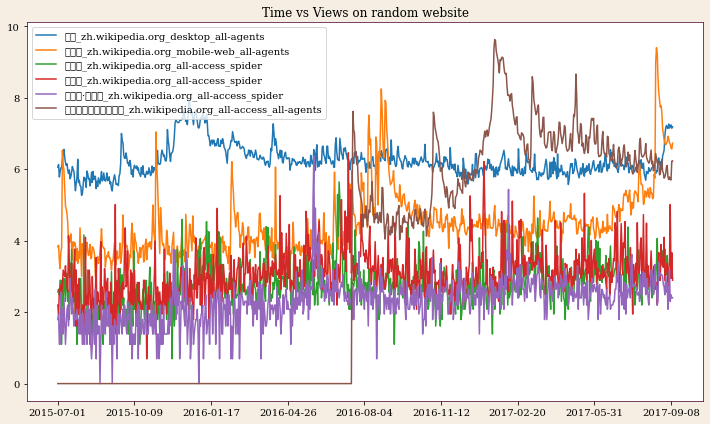

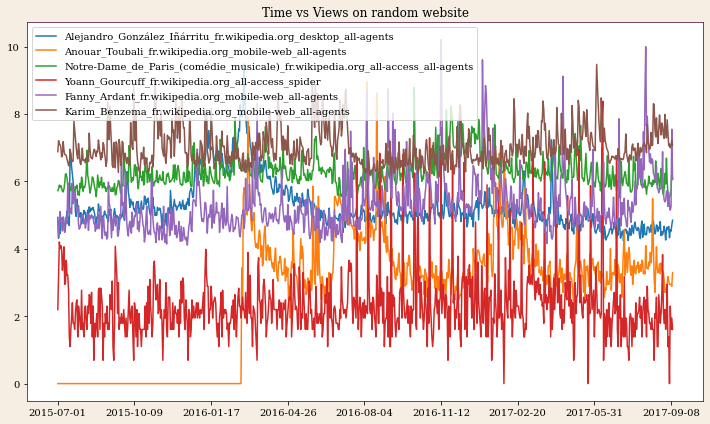

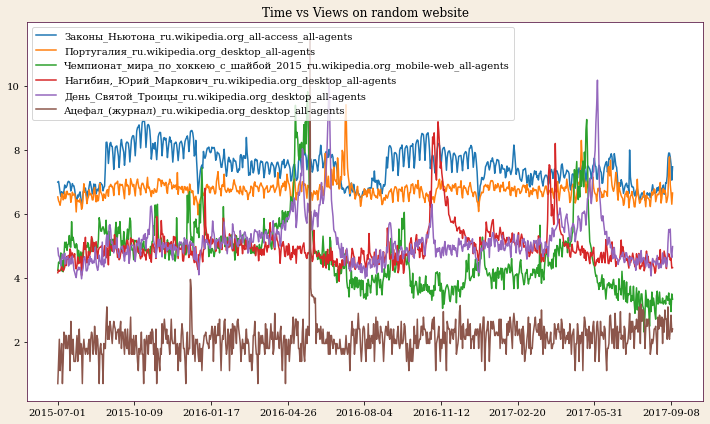

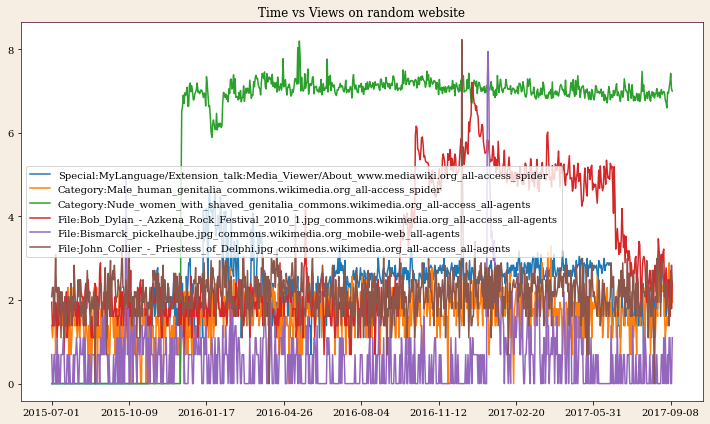

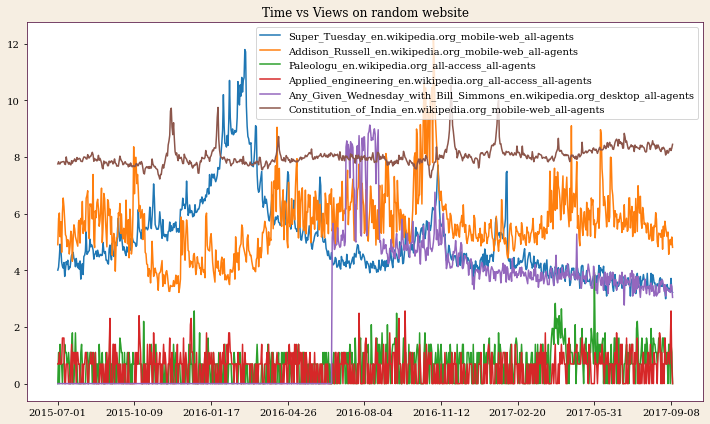

In [ ]:
plot_graph(lang_ja,6), plot_graph(lang_es,6), plot_graph(lang_de,6), plot_graph(lang_zh,6), plot_graph(lang_fr,6), plot_graph(lang_ru,6),plot_graph(lang_na,6), plot_graph(lang_en,6)

In [ ]:
#Sample Dataset
samplePlot = dataframe.iloc[:101, 1:-1].T.reset_index().rename(columns = {'index': 'Date', 100 : 'Views1', 101:'Views2'})
samplePlot['Date'] = pd.to_datetime(samplePlot['Date'], errors='coerce')
samplePlot.set_index('Date')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,Views1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,0.0,12.0,0.0,118.0,5.0,6.0,0.0,2.0,2.0,0.0,8.0,40.0,61.0,4.0,13.0,0.0,22.0,25.0,19.0,23.0,0.0,11.0,22.0,0.0,291.0,3.0,10.0,2.0,1.0,4.0,26.0,13.0,1.0,0.0,0.0,1.0,...,14.0,1.0,21.0,0.0,44.0,0.0,8.0,0.0,0.0,0.0,20.0,67.0,0.0,10.0,11.0,34.0,3.0,0.0,7.0,1.0,0.0,0.0,0.0,56.0,24.0,9.0,28.0,8.0,0.0,2.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2015-07-02,11.0,14.0,0.0,13.0,0.0,7.0,0.0,26.0,23.0,3.0,0.0,1.0,5.0,0.0,27.0,17.0,33.0,8.0,7.0,0.0,11.0,3.0,6.0,24.0,0.0,5.0,67.0,0.0,64.0,53.0,9.0,0.0,10.0,4.0,30.0,29.0,2.0,0.0,0.0,4.0,...,13.0,4.0,5.0,0.0,31.0,0.0,2.0,0.0,1.0,0.0,3.0,34.0,0.0,1.0,18.0,10.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,25.0,11.0,4.0,14.0,4.0,0.0,6.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,9.0,0.0,8.0
2015-07-03,5.0,15.0,1.0,10.0,0.0,4.0,0.0,30.0,14.0,5.0,0.0,4.0,5.0,0.0,9.0,25.0,21.0,4.0,14.0,0.0,23.0,3.0,12.0,31.0,0.0,13.0,26.0,0.0,26.0,11.0,5.0,1.0,17.0,5.0,22.0,7.0,3.0,0.0,0.0,3.0,...,14.0,4.0,10.0,0.0,18.0,0.0,9.0,0.0,4.0,0.0,10.0,15.0,0.0,5.0,23.0,16.0,5.0,1.0,9.0,1.0,0.0,0.0,0.0,7.0,24.0,9.0,6.0,6.0,0.0,5.0,0.0,1.0,17.0,0.0,0.0,0.0,0.0,12.0,0.0,6.0
2015-07-04,13.0,18.0,1.0,94.0,0.0,5.0,0.0,24.0,12.0,12.0,0.0,4.0,1.0,0.0,25.0,42.0,10.0,9.0,11.0,0.0,10.0,4.0,14.0,9.0,0.0,8.0,34.0,0.0,20.0,3.0,4.0,5.0,10.0,52.0,27.0,1.0,2.0,0.0,0.0,5.0,...,13.0,2.0,25.0,0.0,34.0,0.0,12.0,0.0,1.0,0.0,14.0,9.0,0.0,14.0,23.0,10.0,3.0,2.0,3.0,3.0,0.0,0.0,0.0,50.0,19.0,11.0,24.0,8.0,0.0,21.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,14.0,0.0,4.0
2015-07-05,14.0,11.0,0.0,4.0,0.0,20.0,0.0,29.0,9.0,6.0,0.0,2.0,3.0,0.0,25.0,41.0,26.0,7.0,20.0,0.0,6.0,12.0,13.0,21.0,0.0,6.0,38.0,0.0,28.0,4.0,15.0,5.0,4.0,2.0,27.0,2.0,4.0,0.0,0.0,3.0,...,26.0,4.0,23.0,0.0,56.0,0.0,13.0,0.0,5.0,0.0,4.0,9.0,0.0,6.0,51.0,13.0,8.0,0.0,5.0,0.0,0.0,0.0,0.0,90.0,17.0,10.0,14.0,10.0,0.0,4.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,6.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-06,27.0,25.0,7.0,16.0,23.0,20.0,10.0,44.0,44.0,32.0,14.0,12.0,4.0,25.0,48.0,66.0,30.0,16.0,8.0,15.0,30.0,17.0,15.0,40.0,17.0,21.0,32.0,6.0,48.0,13.0,15.0,17.0,14.0,20.0,36.0,34.0,7.0,12.0,26.0,9.0,...,62.0,6.0,27.0,11.0,109.0,22.0,34.0,12.0,11.0,10.0,14.0,11.0,19.0,19.0,26.0,37.0,11.0,3.0,6.0,5.0,10.0,14.0,4.0,14.0,17.0,36.0,10.0,14.0,12.0,16.0,5.0,5.0,4.0,17.0,5.0,30.0,13.0,10.0,16.0,7.0
2017-09-07,29.0,26.0,3.0,19.0,28.0,18.0,8.0,25.0,33.0,34.0,44.0,6.0,2.0,13.0,38.0,24.0,77.0,8.0,22.0,7.0,46.0,22.0,12.0,60.0,14.0,14.0,56.0,9.0,67.0,11.0,19.0,12.0,10.0,71.0,58.0,169.0,8.0,12.0,30.0,8.0,...,39.0,7.0,23.0,11.0,82.0,124.0,34.0,8.0,4.0,5.0,20.0,8.0,27.0,28.0,35.0,43.0,13.0,4.0,7.0,5.0,10.0,23.0,3.0,19.0,17.0,24.0,6.0,26.0,6.0,55.0,32.0,9.0,10.0,26.0,13.0,22.0,11.0,16.0,14.0,14.0
2017-09-08,23.0,23.0,4.0,30.0,14.0,17.0,5.0,39.0,52.0,29.0,62.0,8.0,6.0,34.0,85.0,37.0,32.0,14.0,12.0,10.0,19.0,26.0,18.0,39.0,15.0,19.0,62.0,16.0,29.0,12.0,12.0,11.0,11.0,18.0,27.0,57.0,9.0,7.0,34.0,8.0,...,101.0,8.0,17.0,16.0,87.0,42.0,26.0,11.0,7.0,9.0,12.0,12.0,18.0,17.0,24.0,30.0,12.0,5.0,9.0,3.0,7.0,101.0,2.0,36.0,12.0,36.0,9.0,17.0,7.0,12.0,6.0,7.0,10.0,16.0,5.0,14.0,8.0,11.0,9.0,6.0


In [ ]:
# lang_ja = dataframe[dataframe['lang'] == 'ja']
# lang_es = dataframe[dataframe['lang'] == 'es']
# lang_de = dataframe[dataframe['lang'] == 'de']
# lang_zh = dataframe[dataframe['lang'] == 'zh']
# lang_fr = dataframe[dataframe['lang'] == 'fr']
# lang_ru = dataframe[dataframe['lang'] == 'ru']
# lang_na = dataframe[dataframe['lang'] == 'na']
# lang_en = dataframe[dataframe['lang'] == 'en']

lang_sets = {}
lang_sets['en'] = dataframe[dataframe.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = dataframe[dataframe.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = dataframe[dataframe.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = dataframe[dataframe.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = dataframe[dataframe.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = dataframe[dataframe.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = dataframe[dataframe.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = dataframe[dataframe.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

We group the articles in terms of language and analyse them

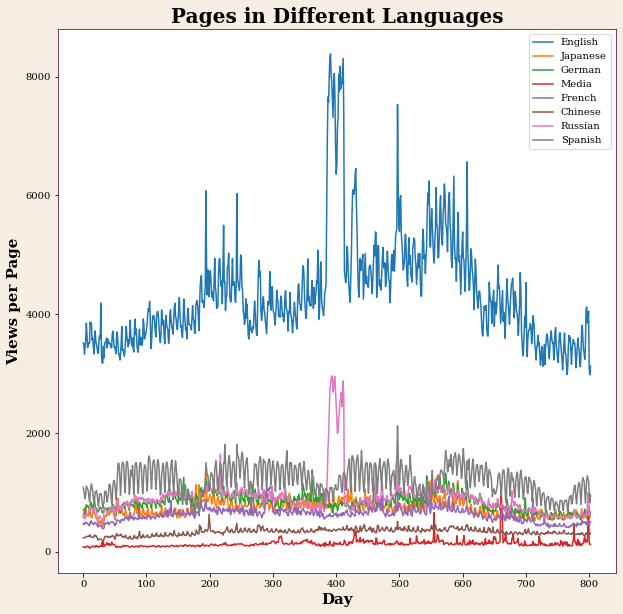



English Wikipedia has the largest traffic of all languages
Hence we conclude that there is different traffic based on the language


In [ ]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page', fontsize = 15, fontweight = 'bold')
plt.xlabel('Day', fontsize = 15, fontweight = 'bold')
plt.title('Pages in Different Languages', fontsize = 20, fontweight = 'bold')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )

   
plt.legend()
plt.show()
print('\n\nEnglish Wikipedia has the largest traffic of all languages\nHence we conclude that there is different traffic based on the language')

Text(0.5, 1.0, 'Plot of Sample dataset')

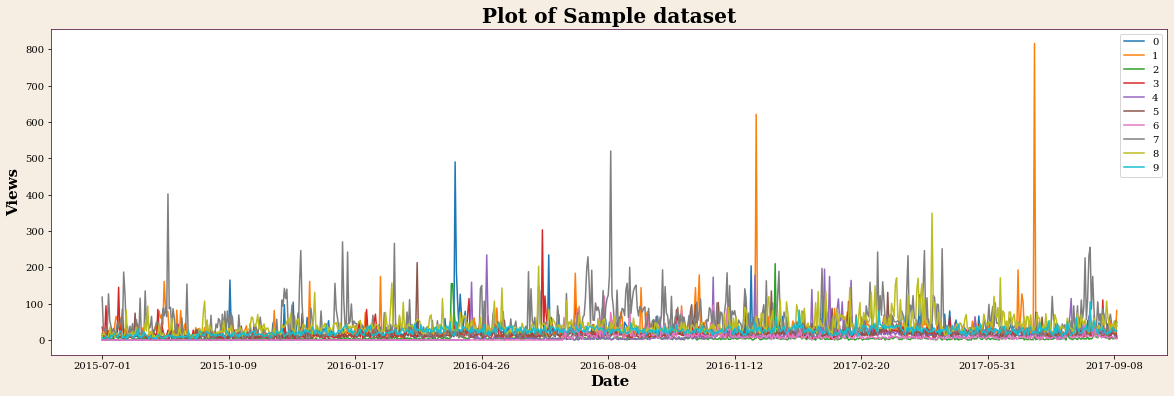

In [ ]:
samplePlot = dataframe.iloc[:10, 1:-1].T.reset_index().rename(columns = {'index': 'Date'})
samplePlot.plot(x = 'Date', figsize = [20,6])
plt.xlabel("Date", fontsize = 15, fontweight = 'bold')
plt.ylabel("Views", fontsize = 15, fontweight = 'bold')
plt.title('Plot of Sample dataset', fontsize = 20, fontweight = 'bold')


Text(0.5, 1.0, 'Plot of Single Article')

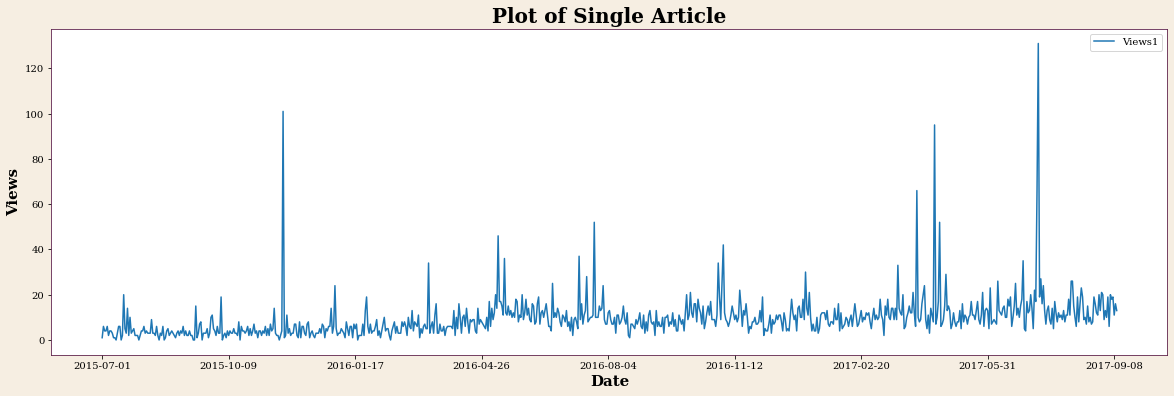

In [ ]:
samplePlot = dataframe.iloc[[1000], 1:-1].T.reset_index().rename(columns = {'index': 'Date', 1000 : 'Views1'})
samplePlot.plot(x = 'Date', figsize = [20,6])
plt.xlabel("Date", fontsize = 15, fontweight = 'bold')
plt.ylabel("Views", fontsize = 15, fontweight = 'bold')
plt.title('Plot of Single Article', fontsize = 20, fontweight = 'bold')

# **Resampling**

**Monthly**

Text(0.5, 1.0, 'Monthly Resampled Plot')

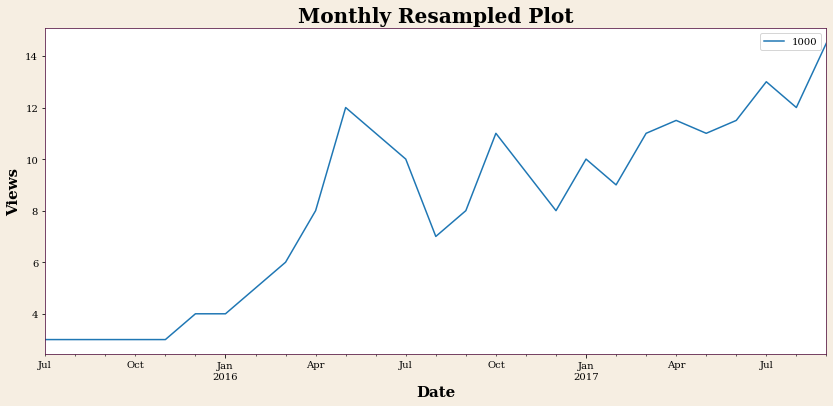

In [ ]:
samplePlot = dataframe.iloc[[1000], 1:-1].T.reset_index().rename(columns = {'index': 'Date'})
samplePlot['Date'] = pd.to_datetime(samplePlot['Date'], errors='coerce')
samplePlot.resample('M', on = 'Date').median().plot(figsize = [14,6])
plt.ylabel('Views', fontsize = 15, fontweight = 'bold')
plt.xlabel('Date', fontsize = 15, fontweight = 'bold')
plt.title('Monthly Resampled Plot', fontsize = 20, fontweight = 'bold')


**Weekly**

Text(0.5, 1.0, 'Weekly Resampled Plot')

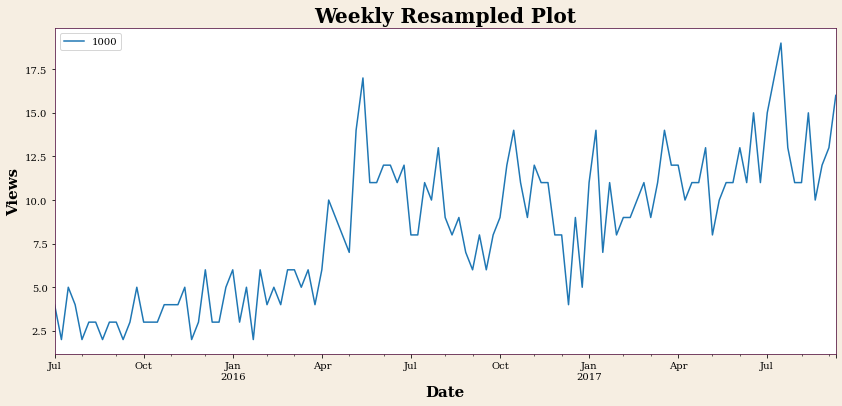

In [ ]:
samplePlotW = dataframe.iloc[[1000], 1:-1].T.reset_index().rename(columns = {'index': 'Date'})
samplePlotW['Date'] = pd.to_datetime(samplePlotW['Date'], errors='coerce')
samplePlotW = samplePlotW.resample('W', on = 'Date').median()
samplePlotW.plot(figsize = [14,6])
plt.ylabel('Views', fontsize = 15, fontweight = 'bold')
plt.xlabel('Date', fontsize = 15, fontweight = 'bold')
plt.title('Weekly Resampled Plot', fontsize = 20, fontweight = 'bold')

In [ ]:
samplePlotW = dataframe.iloc[[1000], 1:-1].T.reset_index().rename(columns = {'index': 'Date'})

def convertToDatetime(df):
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
  return df['Date']

samplePlotW['Date'] = convertToDatetime(samplePlotW)
samplePlotW = samplePlotW.resample('W', on = 'Date').mean()
 
samplePlot['Date'] = convertToDatetime(samplePlot)
samplePlot = samplePlot.set_index('Date')

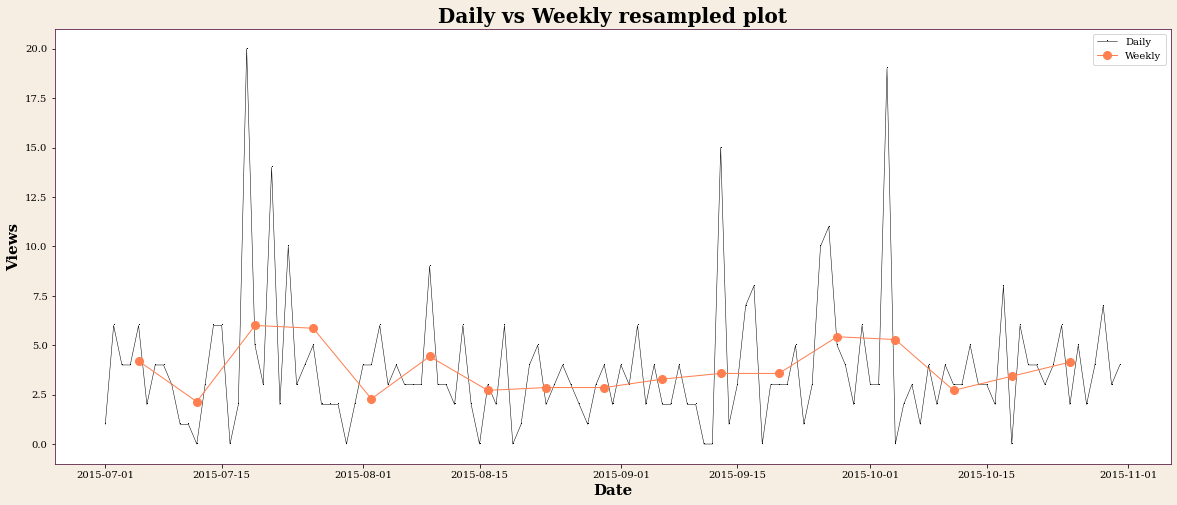

In [ ]:
def plotN(dfs, markers, markersizes, linewidths, labels, colors, title, fig):
  fig, ax = plt.subplots(figsize=fig)
  for x in range(0, len(dfs)):
    ax.plot(dfs[x].loc['2015-01':'2015-10' , :], marker = markers[x] , markersize = markersizes[x], linestyle = '-', label = labels[x], color = colors[x], linewidth = linewidths[x])

  ax.set_ylabel("Views")
  ax.legend()
  plt.ylabel('Views', fontsize = 15, fontweight = 'bold')
  plt.xlabel('Date', fontsize = 15, fontweight = 'bold')
  plt.title(title, fontsize = 20, fontweight = 'bold')
  plt.show()

plotN([samplePlot, samplePlotW], [',', 'o'], [4, 8], [0.5, 1], ['Daily', 'Weekly'], ['black', 'coral'], 'Daily vs Weekly resampled plot', (20, 8))

# **Rolling Plot**

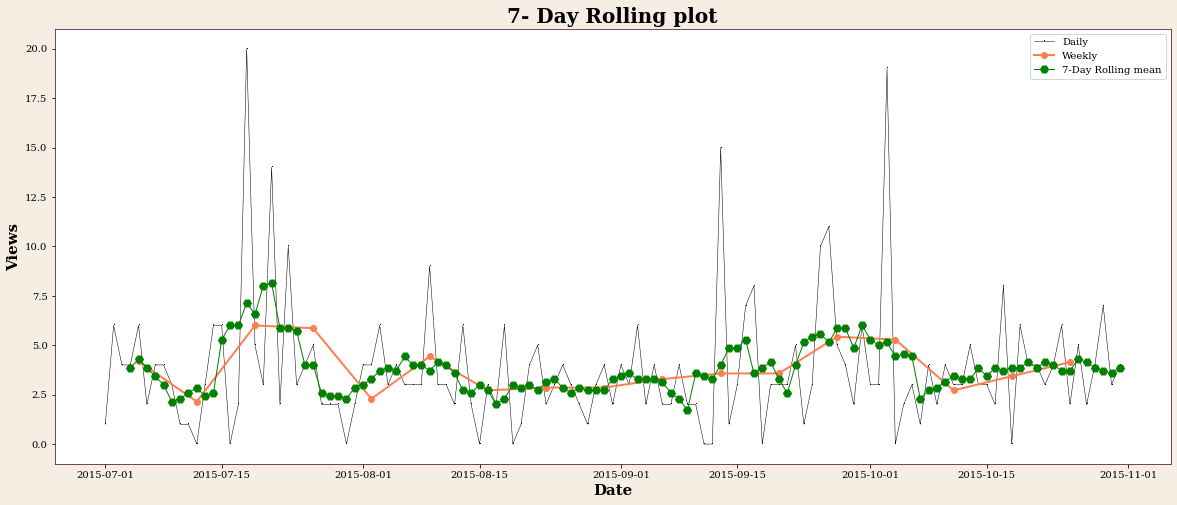

In [ ]:
rollingPlot = samplePlot.rolling(7, center = True).mean()
plotN([samplePlot, samplePlotW, rollingPlot], [',', 'o', 'H'], [4, 6, 8], [0.5, 2, 1], ['Daily', 'Weekly', '7-Day Rolling mean'], ['black', 'coral', 'green'], '7- Day Rolling plot', (20, 8))

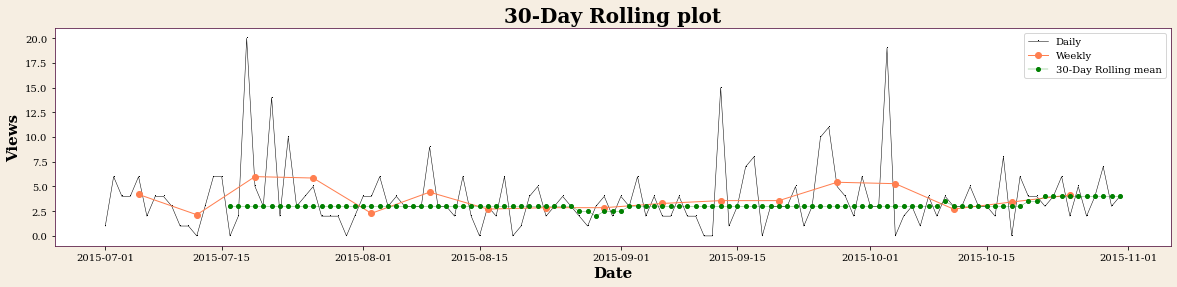

In [ ]:
rollingPlot = samplePlot.rolling(30, center = True).median()
plotN([samplePlot, samplePlotW, rollingPlot], [',', 'o', '.'], [4, 6, 8], [0.5, 1, 0.3], ['Daily', 'Weekly', '30-Day Rolling mean'], ['black', 'coral', 'green'], '30-Day Rolling plot', (20, 4))